In [47]:
library('tidyverse')
library('lubridate')

In [2]:
date = '2021-05-04'

In [3]:
#Turns this into a date object in R
#This date object can be sorted in ways that we would expect
ymd(date)

[1] "2021-05-04"

In [4]:
#Can pull the number of the month from a date objects
ymd(date) |> month()

[1] 5

In [5]:
df = tribble(
    ~colA, ~colB,
    "2021-01-01", 1,
    "2022-01-01", 2,
    "2023-01-01", 3)

df

colA,colB
<chr>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


In [6]:
df |> mutate(colA = ymd(colA))

colA,colB
<date>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


<span style = "color:blue;">Date Specifications: https://readr.tidyverse.org/reference/parse_datetime.html#format-specification

In [7]:
#Year is always Y -- capital Y for 4 number year
df |> mutate(colA = parse_date(colA, format = '%Y-%m-%d'))

colA,colB
<date>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


In [8]:
df.myd = tribble(
    ~colA, ~colB,
    "01-2021-01", 1,
    "01-2022-01", 2,
    "01-2023-01", 3)

df.myd

colA,colB
<chr>,<dbl>
01-2021-01,1
01-2022-01,2
01-2023-01,3


In [9]:
#The ISO format is applied and displayed as YYYY-M-D even if that's not what the origional format is
df.myd |> mutate(colA = parse_date(colA, format = '%m-%Y-%d'))

colA,colB
<date>,<dbl>
2021-01-01,1
2022-01-01,2
2023-01-01,3


### Reading in dates

In [18]:
bird_feeder_data = read_csv('
    https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv', 
    col_types = cols(Year = col_date(%Y))
)

bird_feeder_data |> 
    select(Year, Month, Day, species_code, how_many) |>
    head()

ERROR: Error in parse(text = x, srcfile = src): <text>:3:38: unexpected input
2:     https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv', 
3:     col_types = cols(Year = col_date(%Y))
                                        ^


In [25]:
bird_feeder_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv', 
    col_types = cols()
) |> 
    select(Year, Month, Day, species_code, how_many) |>
    mutate(date = make_date(year = Year, month = Month, day = Day)) #New column that is combo of these values; the order matters

bird_feeder_data |> head()

Year,Month,Day,species_code,how_many,date
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>
2021,3,4,amegfi,20,2021-03-04
2020,12,19,moudov,11,2020-12-19
2021,2,13,tuftit,2,2021-02-13
2021,1,13,houspa,2,2021-01-13
2021,1,11,balori,10,2021-01-11
2021,3,13,norcar,2,2021-03-13


In [24]:
bird_feeder_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv',
    col_types = cols()
) |> 
    select(Year, Month, Day, species_code, how_many) |>
    mutate(date = make_date(year = Year, month = Month, day = Day))

bird_feeder_data |> head()

Year,Month,Day,species_code,how_many,date
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>
2021,3,4,amegfi,20,2021-03-04
2020,12,19,moudov,11,2020-12-19
2021,2,13,tuftit,2,2021-02-13
2021,1,13,houspa,2,2021-01-13
2021,1,11,balori,10,2021-01-11
2021,3,13,norcar,2,2021-03-13


<span style = "color:blue;">Question might ask: What are the most common birds in this data set?
    
<span style = "color:blue;">Could define common as - the ones that were observed the most accross all dates & baths and feeders

In [37]:
species_code_count = bird_feeder_data |>
    count(species_code, wt = how_many) |>
    arrange(desc(n)) |>
    mutate(species_code = fct_inorder(species_code) |> fct_rev()) #ordering this for the chart below; fct_rev() reverses order
    

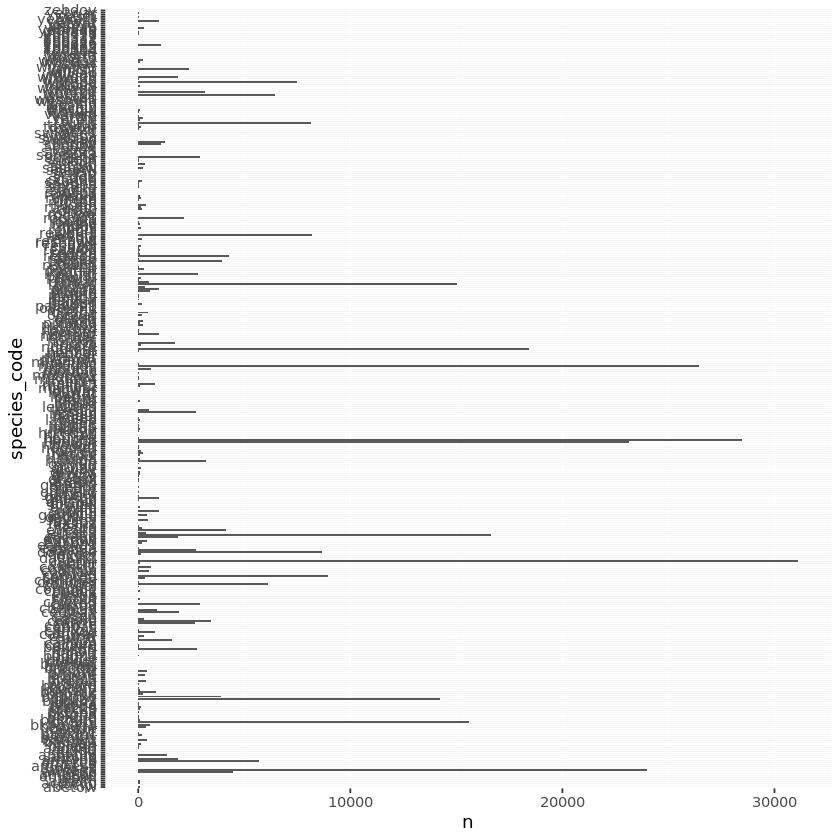

In [30]:
p = ggplot(species_code_count, aes(y = species_code, x = n)) + geom_col()
p

#Not great table for final project

In [32]:
top10_birds = species_code_count |> 
    slice_max(order_by = n, n =10) |>
    pull(species_code)

top10_birds

#This is a better dataset to plot

[1] "daejun" "houspa" "moudov" "amegfi" "houfin" "norcar" "eursta" "bkcchi"
 [9] "pinsis" "blujay"

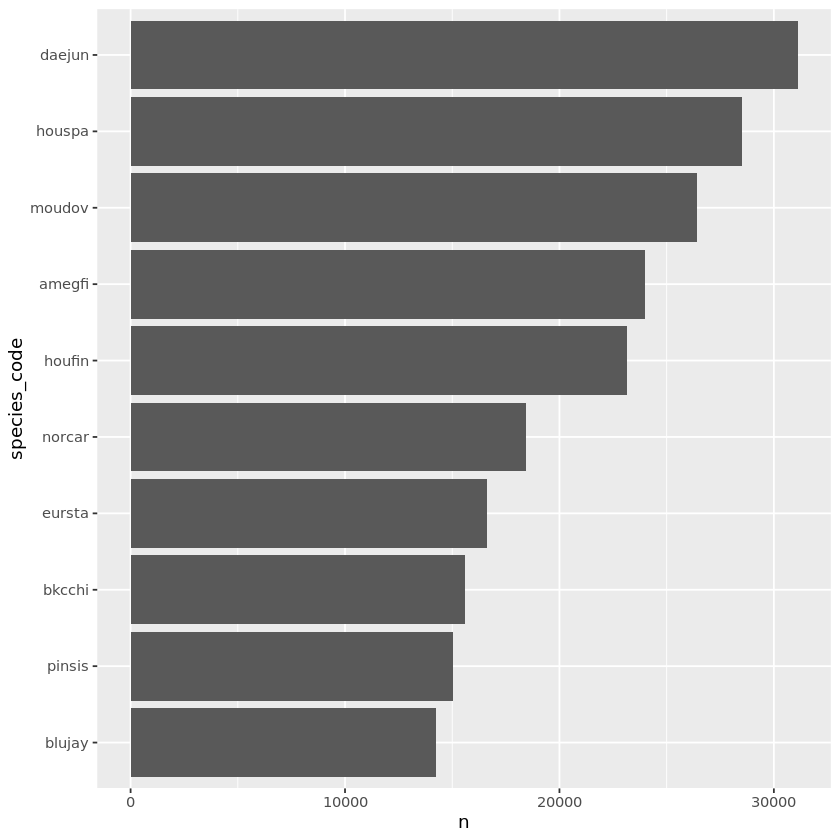

In [38]:
p = ggplot(species_code_count |> filter(species_code %in% top10_birds), 
           aes(y = species_code, x = n)) + geom_col()
p

<span style = "color:blue;">Now we want to plot the most abundant type of bird seen over time

In [43]:
bird_feeder_data_daejun = bird_feeder_data |> 
    filter(species_code == 'daejun') |>
    group_by(date, species_code) |>
    summarise(how_many = sum(how_many), .groups = 'drop')

#Think of this as line chart with how_many on y-axis and date on x-axis
bird_feeder_data_daejun |> head()

date,species_code,how_many
<date>,<chr>,<dbl>
2020-11-14,daejun,531
2020-11-15,daejun,141
2020-11-16,daejun,121
2020-11-17,daejun,157
2020-11-18,daejun,70
2020-11-19,daejun,26


In [ ]:
#We might need to do some aggregation before plotting...
#We do have mulitple values by date -- so will need to aggregate before making the chart with with how_many on y-axis and date on x-axis

bird_feeder_data_daejun |>
    arrange(date) |>
    head()

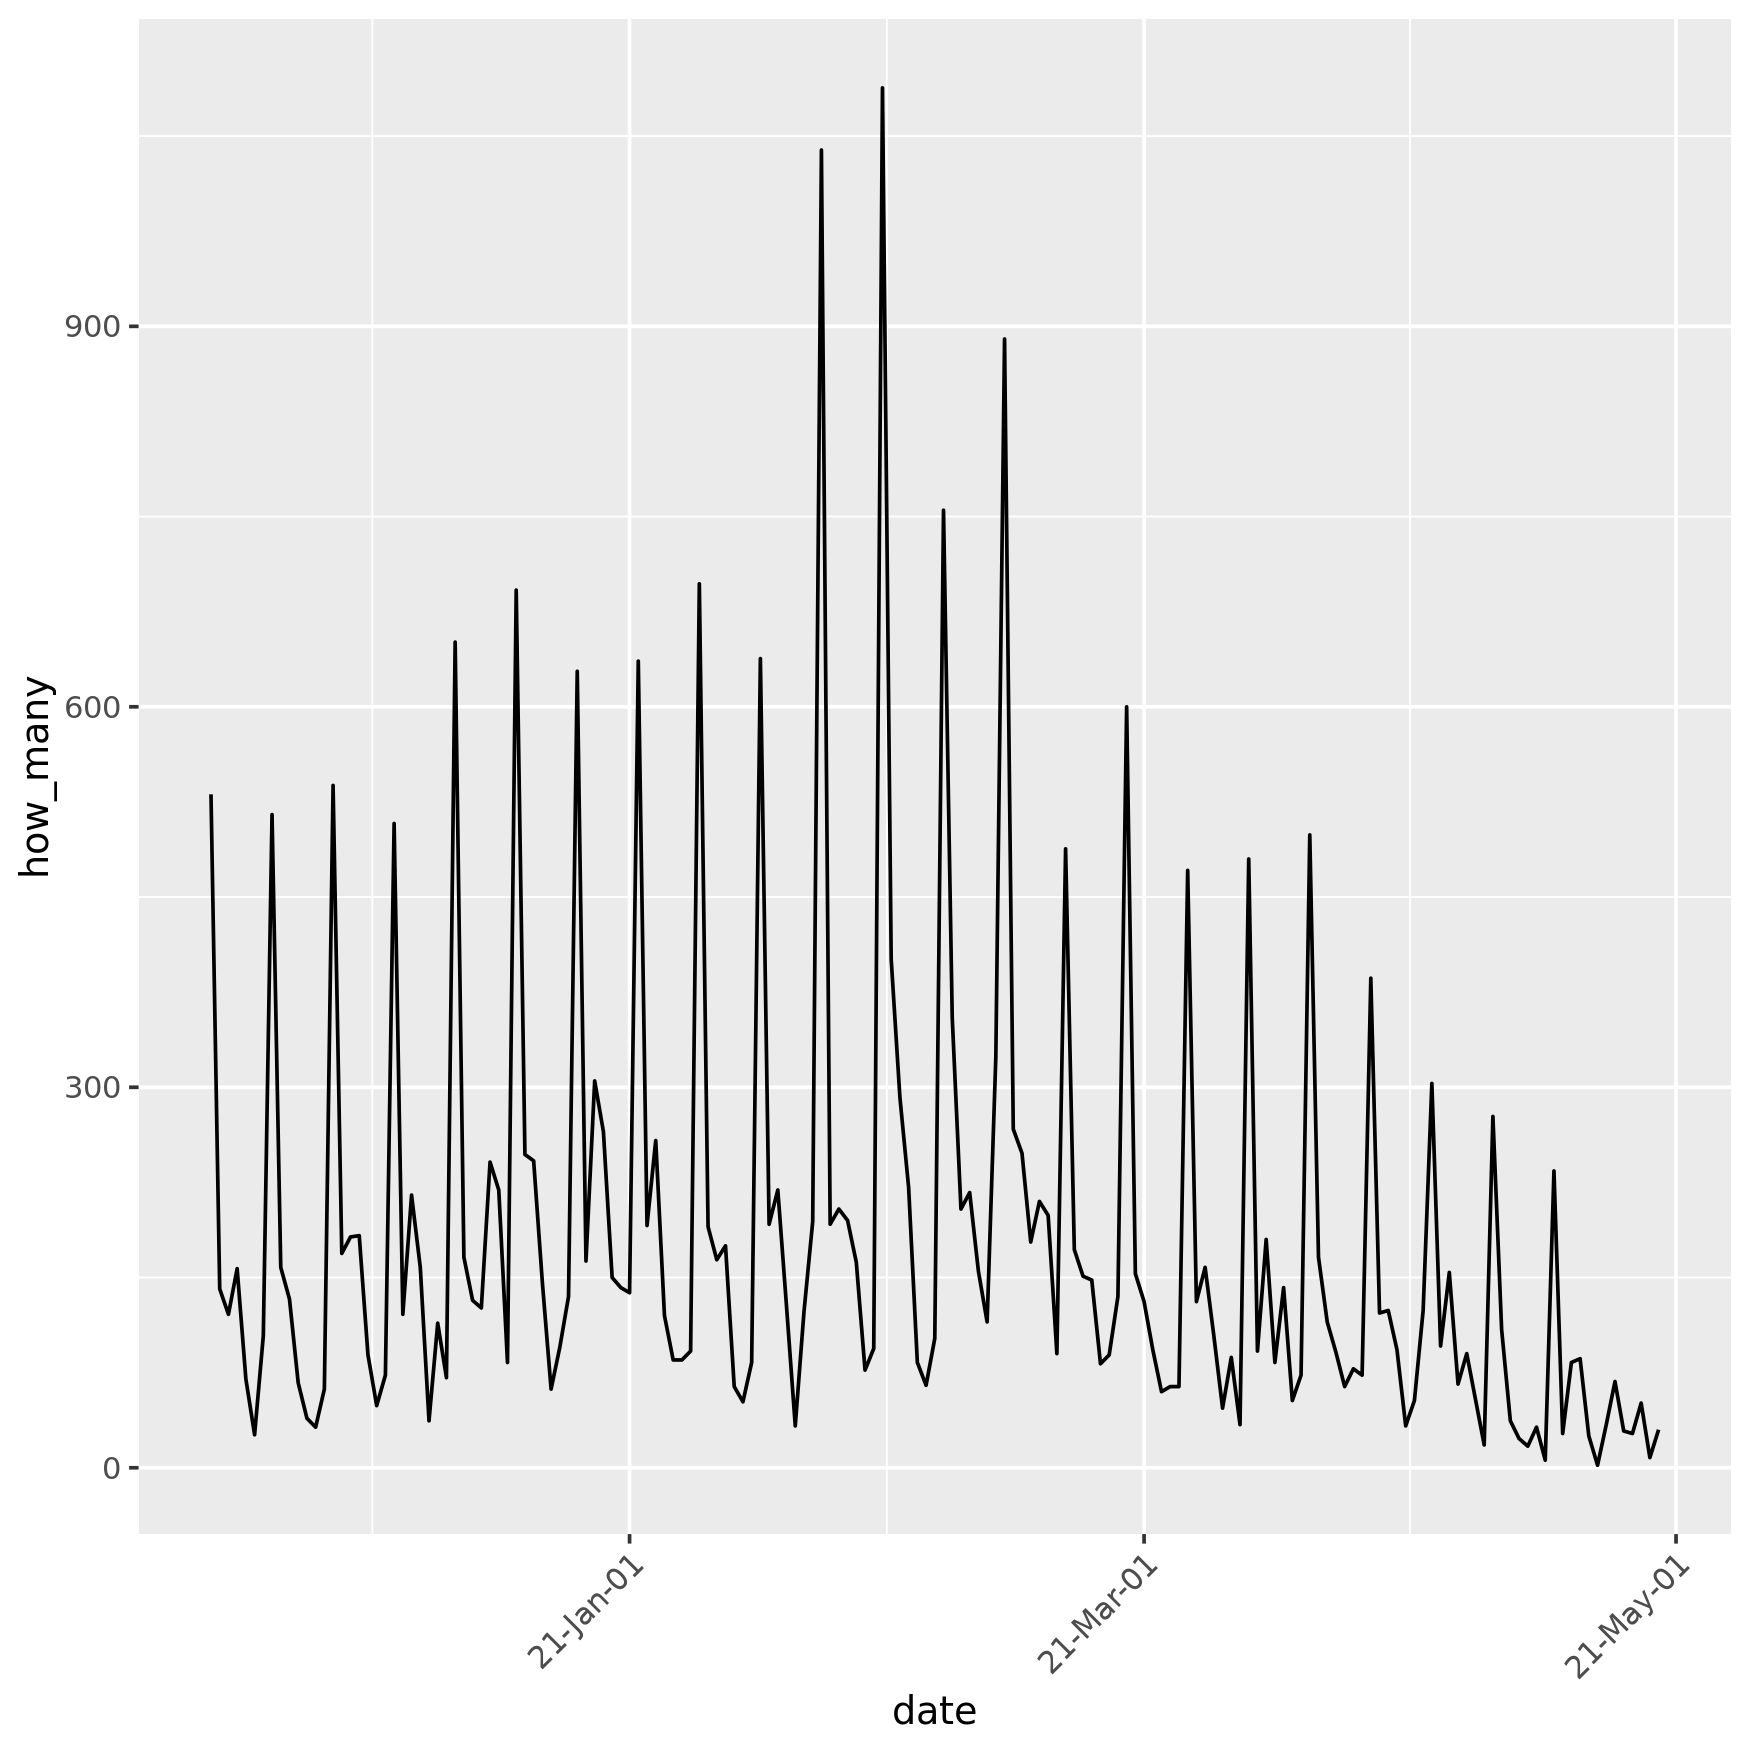

In [56]:
options(repr.plot.res = 250)
p2 = ggplot(bird_feeder_data_daejun, aes(x = date, y = how_many)) + 
    geom_line() +
    scale_x_date(date_breaks = '2 months', date_labels = '%y-%b-%d') + #Specify how often we have major scale & gridlines on x-axis
    # scale_x_date(date_breaks = '2 weeks') #another example 
    #More examples of syntax here: https://readr.tidyverse.org/reference/parse_datetime.html#format-specification
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
p2


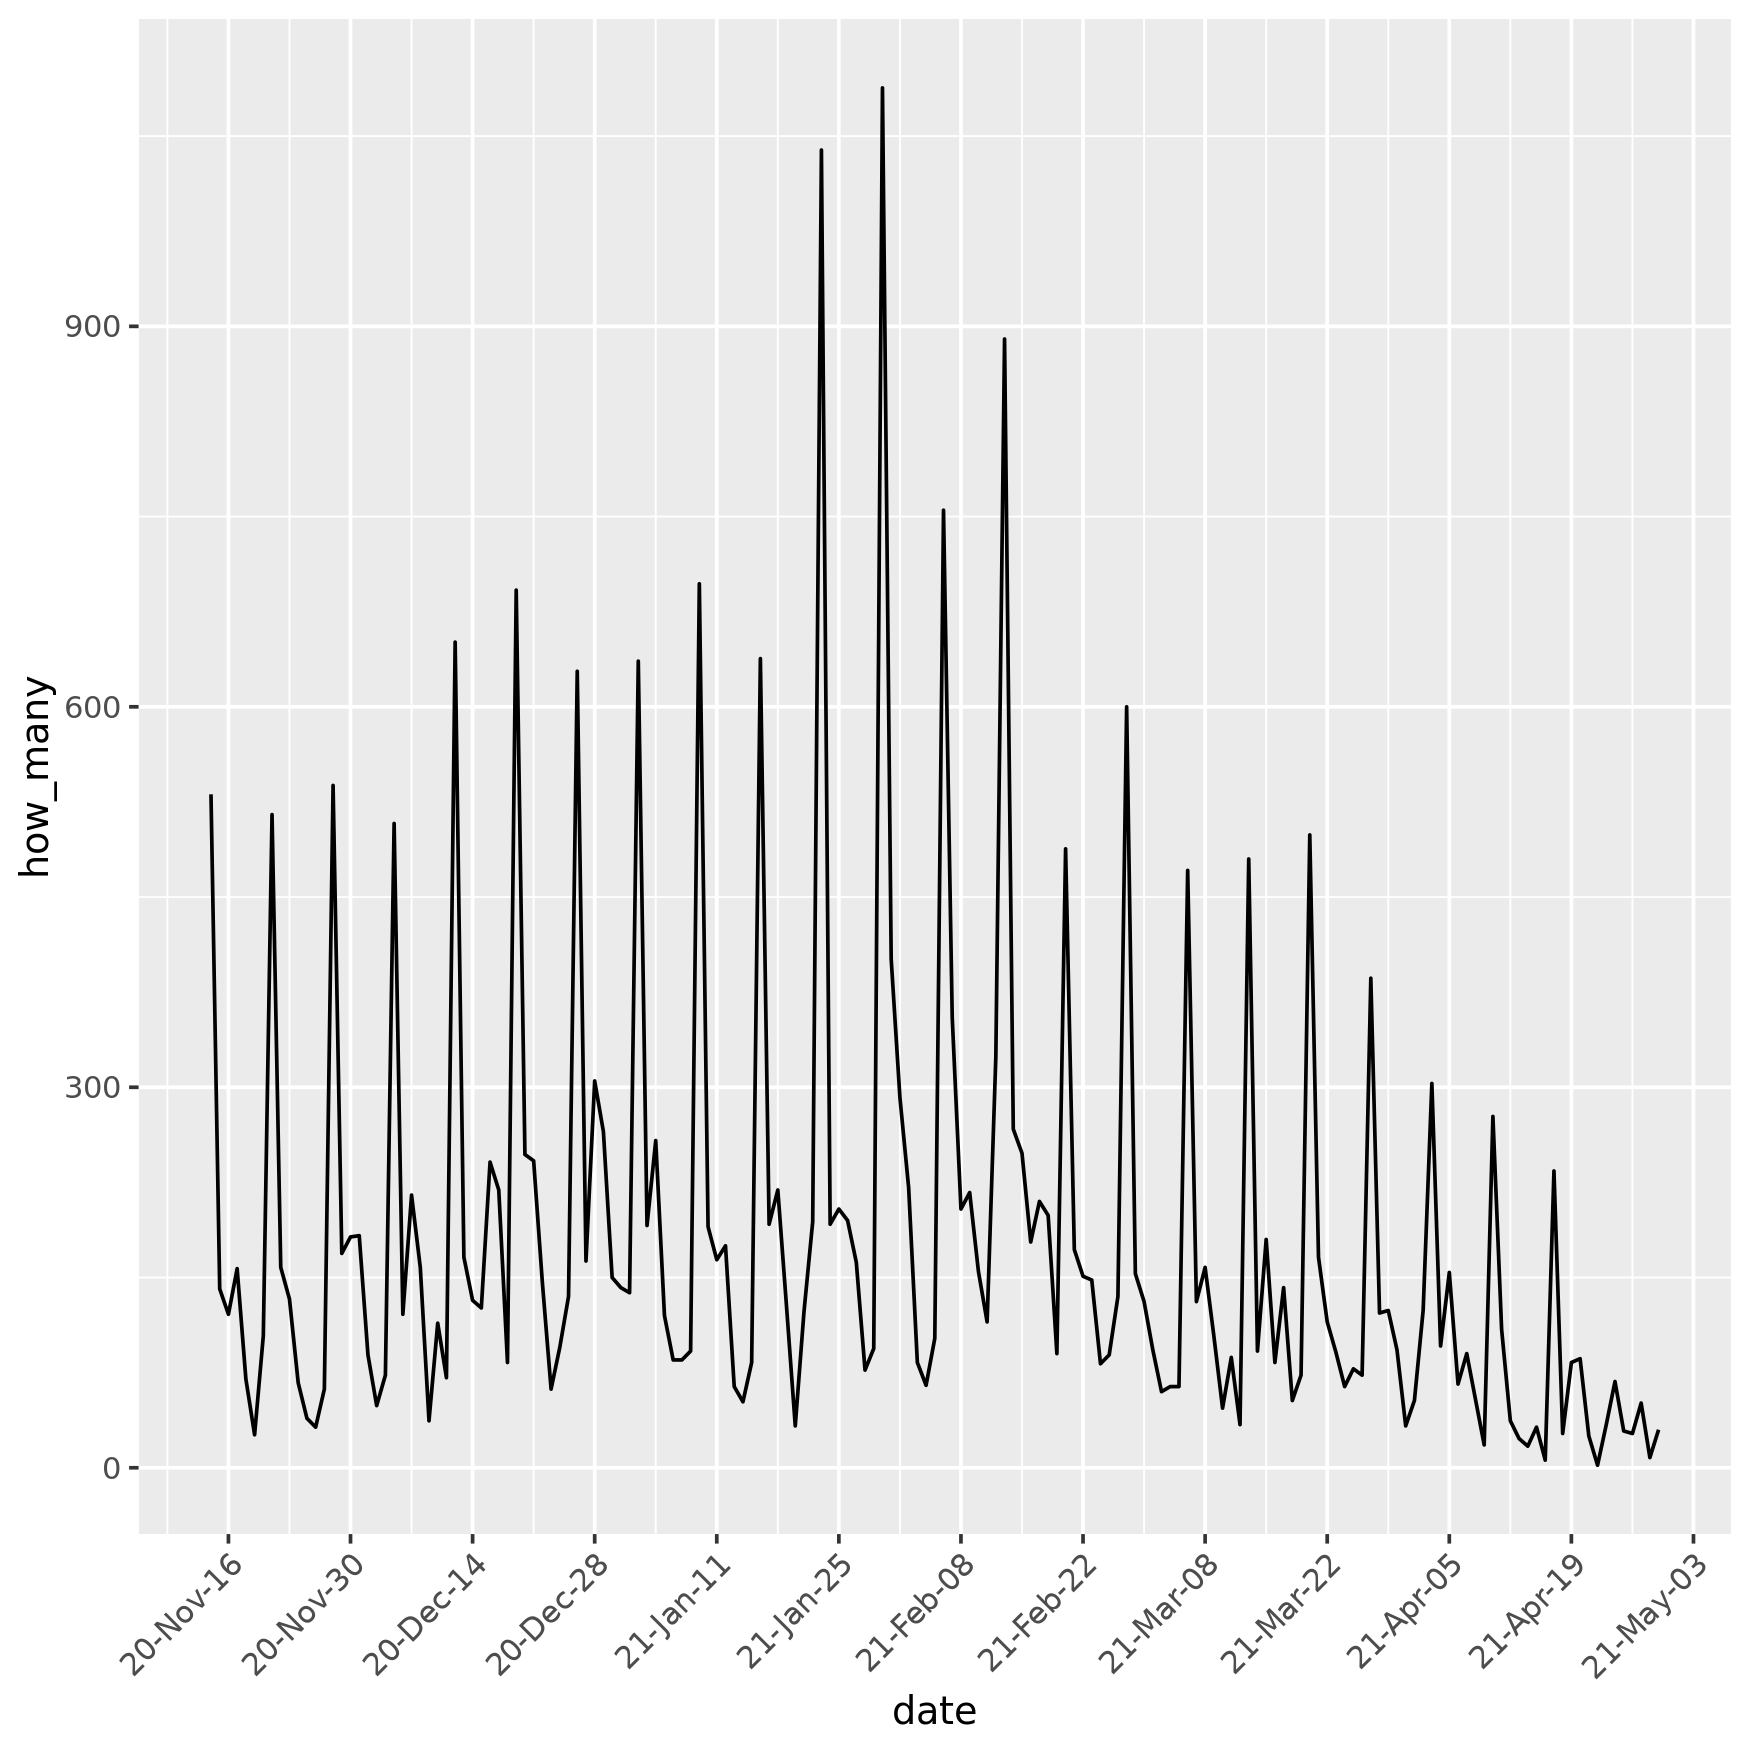

In [57]:
#Chuck code from class

bird_feeder_data_daejun = bird_feeder_data |> 
    filter(species_code == 'daejun') |>
    group_by(date, species_code) |>
    summarize(how_many = sum(how_many), .groups = 'drop')

p = ggplot(bird_feeder_data_daejun, aes(x = date, y = how_many)) + 
    geom_line() +
    scale_x_date(date_breaks = '2 weeks', date_labels = '%y-%b-%d') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p